In [1]:
import quandl
import pandas as pd
import numpy as np
import fbprophet
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from stock import Stock

In [3]:
stock = input("What ticker?")

What ticker?pcg


In [4]:
stock = Stock(stock)

PCG Stocker Initialized. Data covers 1972-06-01 00:00:00 to 2018-03-27 00:00:00.


Maximum Adj. Close = 71.01 on 2017-09-11 00:00:00.
Minimum Adj. Close = 2.29 on 1974-10-04 00:00:00.
Current Adj. Close = 43.94 on 2018-03-27.



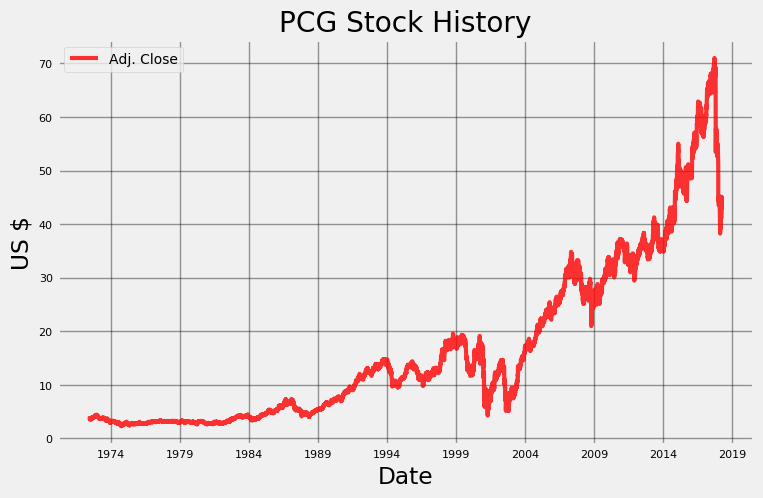

In [5]:
Stock.plot_stock(self=stock, start_date=None, end_date=None, stats=['Adj. Close'], plot_type='basic')

Predicted Price on 2018-07-10 00:00:00 = $30.00


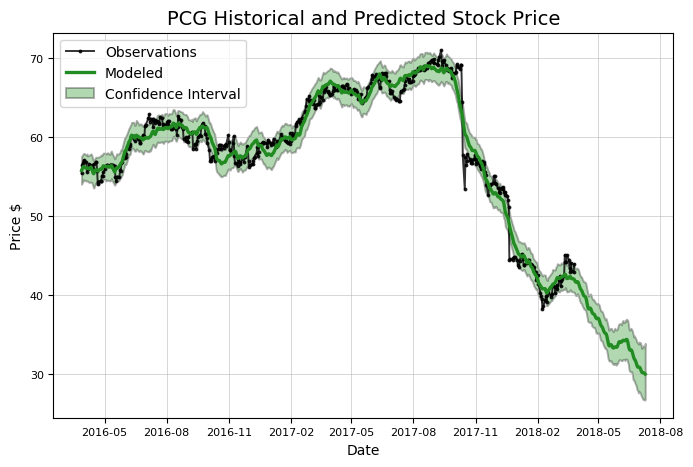

In [6]:
model, model_data = stock.create_prophet_model(days=105)

In [7]:
stock.evaluate_prediction()


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $79.99.
Actual price on    2018-03-23 00:00:00 = $43.08.

Average Absolute Error on Training Data = $0.68.
Average Absolute Error on Testing  Data = $13.02.

When the model predicted an increase, the price increased 50.31% of the time.
When the model predicted a  decrease, the price decreased  54.44% of the time.

The actual value was within the 80% confidence interval 34.00% of the time.


In [8]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

In [9]:
stock.changepoint_prior_validation(start_date='2016-01-04', 
                                    end_date='2017-01-03', 
                                    changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.

     cps  train_err  train_range   test_err  test_range
0  0.001   1.589422     4.876160   2.846463    4.884928
1  0.050   0.802703     2.550309   9.734006   10.057649
2  0.100   0.762538     2.462761  12.046579   13.050887
3  0.200   0.615978     2.013623  22.589771   53.227850


In [11]:
stock.changepoint_prior_scale = 0.5

In [12]:
stock.evaluate_prediction()


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $72.48.
Actual price on    2018-03-23 00:00:00 = $43.08.

Average Absolute Error on Training Data = $0.55.
Average Absolute Error on Testing  Data = $9.32.

When the model predicted an increase, the price increased 51.82% of the time.
When the model predicted a  decrease, the price decreased  55.36% of the time.

The actual value was within the 80% confidence interval 98.00% of the time.


In [13]:
stock.evaluate_prediction(nshares=1000)

You played the stock market in PCG from 2017-03-27 00:00:00 to 2018-03-27 00:00:00 with 1000 shares.

When the model predicted an increase, the price increased 51.82% of the time.
When the model predicted a  decrease, the price decreased  55.36% of the time.

The total profit using the Prophet model = $-2173.58.
The Buy and Hold strategy profit =         $-22577.57.

Thanks for playing the stock market!



/Users/adammercier/Desktop/Final Project/Stock_ed/stock.py:495: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit



Predicted Increase: 

        Date   estimate    change      upper      lower
3 2018-03-30  44.313399  0.108318  45.520022  43.093652
5 2018-04-01  44.810152  0.496752  45.933695  43.534412
6 2018-04-02  44.970631  0.160479  46.166994  43.750972
7 2018-04-03  44.975380  0.004750  46.235265  43.715078

Predicted Decrease: 

         Date   estimate    change      upper      lower
1  2018-03-28  44.213232 -0.016941  45.433785  43.001726
2  2018-03-29  44.205082 -0.008151  45.380105  42.989218
8  2018-04-04  44.878491 -0.096889  46.056584  43.448709
9  2018-04-05  44.787406 -0.091086  45.990708  43.385826
10 2018-04-06  44.775164 -0.012242  46.075909  43.414233


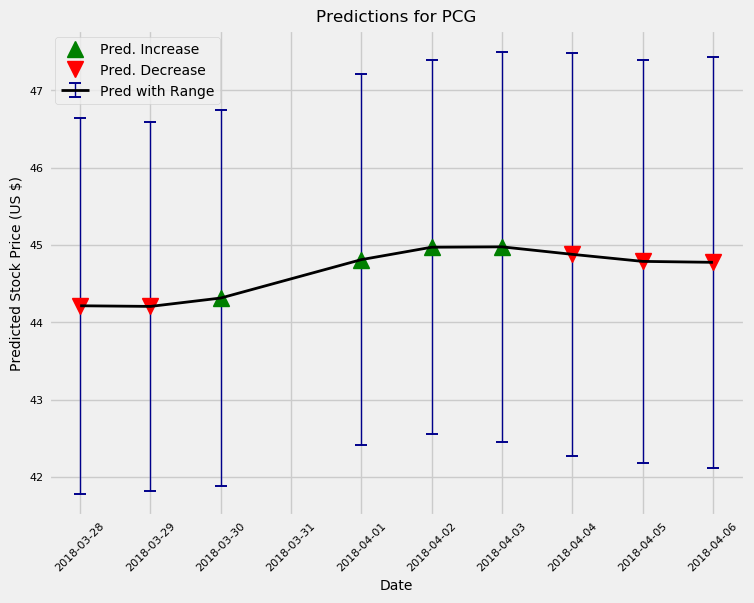

In [14]:
stock.predict_future(days=10)


Predicted Increase: 

         Date   estimate    change      upper      lower
3  2018-03-30  44.313399  0.108318  45.543710  43.139547
5  2018-04-01  44.810152  0.496752  46.067344  43.548704
6  2018-04-02  44.970631  0.160479  46.188719  43.726334
7  2018-04-03  44.975380  0.004750  46.163357  43.737692
12 2018-04-08  44.928243  0.153080  46.342626  43.462015
13 2018-04-09  45.007357  0.079113  46.353752  43.605859
14 2018-04-10  45.074633  0.067277  46.443641  43.559292
15 2018-04-11  45.135597  0.060964  46.616607  43.507261
16 2018-04-12  45.164253  0.028655  46.638386  43.607667
22 2018-04-18  44.647524  0.109981  46.577089  42.591814
23 2018-04-19  44.790686  0.143161  46.721771  42.793440
24 2018-04-20  44.856804  0.066119  46.940711  42.526928
27 2018-04-23  44.766705  0.011476  47.058644  42.328629
28 2018-04-24  44.885111  0.118406  47.361733  41.925627
29 2018-04-25  45.037731  0.152620  47.685031  42.123482
30 2018-04-26  45.114970  0.077239  47.916875  42.259360
34 2018-

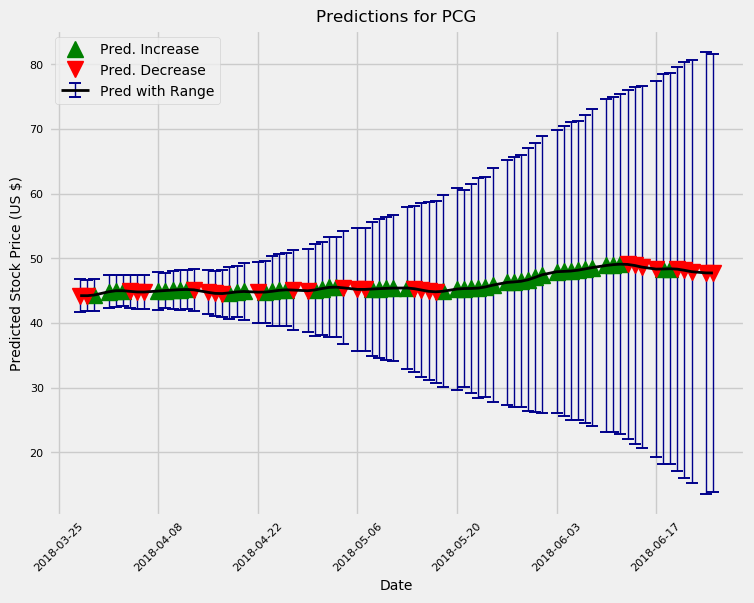

In [15]:
stock.predict_future(days=90)


Predicted Increase: 

Empty DataFrame
Columns: [Date, estimate, change, upper, lower]
Index: []

Predicted Decrease: 

        Date   estimate    change      upper      lower
1 2018-03-28  44.213232 -0.016941  45.453779  43.032758


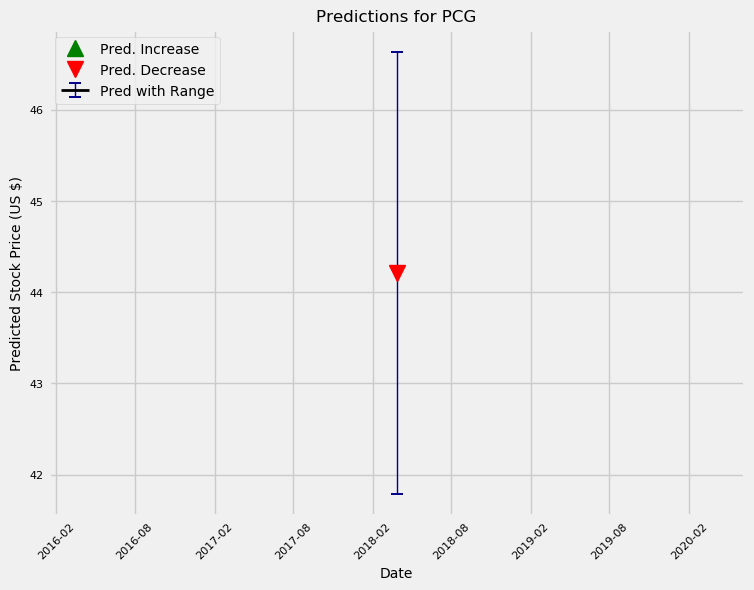

In [16]:
stock.predict_future(days=1)